# Employee Data Visualization

In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from config import postgres_url

#import sql engine
from sqlalchemy import create_engine
engine = create_engine(postgres_url)
connection = engine.connect()

In [3]:
#create employee dataframe from sql query
employee_query = "SELECT * FROM employees"
employees_df = pd.read_sql_query(employee_query,con=engine)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#create salary dataframe from sql query
salary_query = "SELECT * FROM salaries"
salary_df = pd.read_sql_query(salary_query,con=engine)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
#merging the two dataframes
emp_salary_df = employees_df.merge(salary_df, on='emp_no')
emp_salary_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [6]:
#create title dataframe from sql query
title_query = "SELECT * FROM titles"
title_df = pd.read_sql_query(title_query,con=engine)
title_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
#renaming the title_id column to merge
title_df = title_df.rename(columns={"title_id": "emp_title_id"})

#merge into previously merged dataframe
emp_salary_bytitles_df = emp_salary_df.merge(title_df, on='emp_title_id')
emp_salary_bytitles_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


Create a histogram to visualize the most common salary ranges for employees.

In [8]:
#view salary max and min to determine ranges
print(f'min: {min(emp_salary_bytitles_df.salary)}')
print(f'max: {max(emp_salary_bytitles_df.salary)}')

min: 40000
max: 129492


In [9]:
#create bins for the salaries
bins = [40000, 55000, 70000, 85000, 100000, 115000, 130000]
salary_ranges = ['$40,000 - 54,999', '$55,000 - 69,999', '$70,000 - 84,999', '$85,000 - 99,999', '$100,000 - 114,999', '$115,000+']

#cut the data into the bins
emp_salary_bytitles_df['salary range'] = pd.cut(emp_salary_bytitles_df['salary'], bins, labels=salary_ranges, include_lowest=True)

emp_salary_bytitles_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title,salary range
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff,"$40,000 - 54,999"
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff,"$40,000 - 54,999"
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff,"$55,000 - 69,999"
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff,"$85,000 - 99,999"
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff,"$55,000 - 69,999"


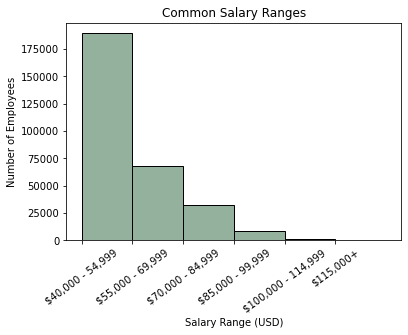

In [14]:
#plot histogram
salaries = emp_salary_bytitles_df['salary']

plt.hist(salaries, bins, color='#93B19C', edgecolor='#000000')
plt.xticks(ticks=bins[:-1], labels=salary_ranges, rotation=36)
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Employees')
plt.title('Common Salary Ranges')

plt.savefig("images\salary_range_plot.png", bbox_inches="tight")

plt.show()

Create a bar chart of average salary by title.

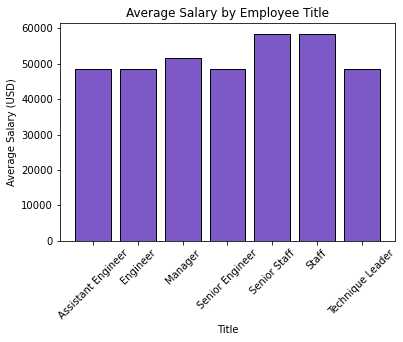

In [15]:
#grouping by title
emp_titles = emp_salary_bytitles_df.groupby('title')
avg_salary_by_title = round(emp_titles.salary.mean(), 2)
avg_salary_by_title

#plotting bar chart
plt.bar(avg_salary_by_title.index, avg_salary_by_title.values, color='#7d58c7', edgecolor='#000000')
plt.xticks(rotation=45)
plt.xlabel('Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employee Title')

plt.savefig("images\salary_by_title_plot.png", bbox_inches="tight")

plt.show()


"On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942."

In [16]:
#searching "my" id number
my_emp_details = emp_salary_bytitles_df.loc[emp_salary_bytitles_df['emp_no'] == 499942, :]

my_emp_details

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title,salary range
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader,"$40,000 - 54,999"
